# 17. NLP Framework의 활용
## NLP 기술의 발전과 framework
모든 모델을 직접 짜보는 것은 실력 향상에 도움이 되지만 모든 논문을 직접 구현할 수 없고, 구현해도 각 모델의 최고 성능을 위해 많은 컴퓨팅 자원을 동원한 pre-training 작업이 필요하다. 또한 논문과 함께 공개된 리서치코드를 이용해 모델을 내 데이터셋과 문제에 적용할 수 있지만 프로젝트마다 다른 코드 스타일, 다른 framework(tensorflow, pytorch 등)을 사용하므로 많은 모델을 분석해 구조를 파악한 후 직접 돌려보고 적용하기는 쉽지 않다. 

### NLP Framework
이 문제를 해결할 수 있는 방법이 NLP Framework이다. 소프트웨어에서 framework란 프로젝트의 뼈대를 이루는 클래스와 인터페이스의 집합이다. 해당 분야의 베스트 프랙티스를 반영해 확장 가능한 템플릿 형태로 설계되어서 framework를 이용해 쉽게 다양한 응용 프로그램을 제작할 수 있다. NLP Framework은 NLP 분야의 최신 논문의 리서치코드를 미리 구현해 pretrained model을 제공한다. framework의 사용자가 다양한 태스크에 맞게 finetuning하는 등 손쉽게 모델을 이용하도록 한다. 대부분의 NLP Framework은 태스크나 데이터셋, 모델에 무관하게 통일된 인터페이스를 기반을 설계된 클래스 구조를 가지고 있어서 최소한의 코드 구현만으로도 다양한 변화에 대응하게 해준다. 

### 목차
1. 다양한 NLP Framework의 출현
2. Huggingface transformers 개요
3. Huggingface transformers (1) Model
4. Huggingface transformers (2) Tokenizer
5. Huggingface transformers (3) Processor
6. Huggingface transformers (4) Config
7. Huggingface transformers (5) Trainer

## 17-2. 다양한 NLP Framework의 출현
- [Top NLP Libraries to Use 2020](https://towardsdatascience.com/top-nlp-libraries-to-use-2020-4f700cdb841f) 정리

### General Framework for NLP
NLP 문제를 가장 일반적으로 해결할 수 있는 통합적인 프레임워크. 전처리-모델링-태스크 훈련/평가를 통합적으로 설계하여 NLP 태스크를 제너럴하게 수행하도록 설계. AllenNLP, Fairseq, Fast.ai, Google의 tensor2tensor 프로젝트.

#### AllenNLP
- 제공자 : Allen AI Institute
- Website : https://allennlp.org/
- Github : https://github.com/allenai/allennlp
- Backend : PyTorch

2018년 초반에 Contextual Word Embedding의 대표적인 모델인 ELMO를 발표하면서 유명해진 Allen Institute에서 만든 NLP framework. 당시 ELMO는 [GLUE Benchmark Test](https://gluebenchmark.com/)와 같이 10가지의 태스크로 구성된 데이터셋을 하나의 모델을 finetune하여 기존의 State-of-the-art 기록을 경신하려고 했다. 하나의 모델로 다양한 태스크를 손쉽게 처리할 수 있도록 프로젝트를 확장하면서 NLP framework로 발전하였다. 이후 AllenNLP는 Glue dataset의 baseline 프로젝트 [Starting Baseline](https://github.com/nyu-mll/GLUE-baselines)를 제공하기도 했다.

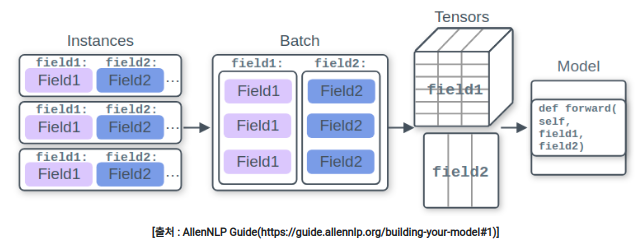

ELMO와 같은 pretrained model의 성공을 바탕으로 NLP framework를 완성해 나가려는 AllenNLP의 시도는 이후 많은 아이디어를 제공했다. AllenNLP는 ELMO, BERT 등 다양한 모델의 활용이 가능하다. 그러나 AllenNLP는 PyTorch 기반으로 설계되었으며 모델이 ```torch.nn.Module```을 상속받는 구조로 설계되었다. Tensorflow나 Keras 기반으로 AllenNLP를 활용하는 것은 어렵다.

#### Fairseq
- 제공자 : Facebook AI Research
- Website : https://fairseq.readthedocs.io/en/latest
- Github : https://github.com/pytorch/fairseq
- Backend : PyTorch

Fairseq는 꾸준히 NLP 연구성과를 내고 있는 Facebook AI Research의 NLP Framework이다. CNN, LSTM, 음성인식/합성 등 sequential한 데이터를 다루는 분야를 두루 다루는 다양한 pretrained model을 함께 제공한다. PyTorch 기반으로 설계되었다.

#### Fast.ai
- 제공자 : fast.ai
- Website : http://docs.fast.ai/
- Github : https://github.com/fastai/fastai
- Backend : PyTorch

빠르게 배우고 쉽게 모델을 구성할 수 있는 하이레벨 API와 Application 블록까지 손쉽게 사용할 수 있도록 구성되어 있다. NLP 분야 외 다양한 분야로 확장 가능하다. PyTorch 기반으로 설계되었다.


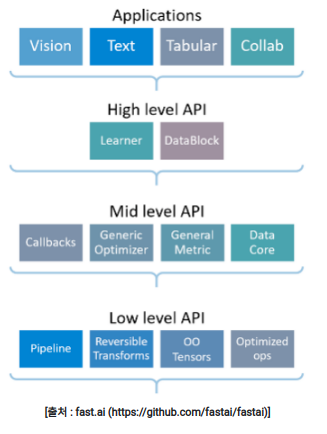

#### tensor2tensor
- 제공자 : Google Brain
- Github : https://github.com/tensorflow/tensor2tensor (deprecated)
- New Github : https://github.com/google/trax
- Backend : Tensorflow

Google Brain에서 2017년에 transformer 논문을 발표하면서 그 구현체로 함께 공유했던 프로젝트. transformer를 중심으로 다양한 태스크와 다양한 모델을 하나의 framework에 통합하려는 시도를 하였다. 2019년부터 Google은 Tensorflow V2 기반으로 pretrained model의 지원을 강화한 trax라는 프로젝트를 생성하면서, 2020년도부터는 tensor2tensor의 개발을 중단하고 관련 기능을 trax로 통합 이관하였다.

### Preprocessing Libraries
전통적으로 사용되었던 NLP 분야의 전처리 관련 framework. tokenization, tagging, parsing 등 특정 전처리 작업을 위해 설계된 라이브러리. Spacy, NLTK, TorchText, KoNLPy 라이브러리 등이 있다.

####  Spacy
- Website : https://spacy.io/
- Github : https://github.com/explosion/spaCy

It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

Tokenization, POS tagging, Dependency Parsing, Lemmatization, Sentence Boundary Detection, Named Entity Recognition, Entity Linking, Similarity, Text Classification, Rule-based Matching, Training, Serialization

#### NLTK
- Website : https://www.nltk.org/
- Github : https://github.com/nltk/nltk

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum. (named entities)

#### TorchText
- Website : https://torchtext.readthedocs.io/en/latest/
- Github : https://github.com/pytorch/text

TorchText datasets(Sentiment Analysis, Question Classification, Entailment, Language Modeling, Machine Translation, Sequence Tagging, Question Answering), data, NLP related modules(nn), etc.

#### KoNLPy
- Website : https://konlpy.org/en/latest/
- Github : https://github.com/konlpy/konlpy

형태소 분석, 품사 태깅, 데이터 등

### Transformer-based Framework
#### Huggingface transformers
- 제공자 : Huggingface.co
- Website : https://huggingface.co/transformers/
- Github : https://github.com/huggingface/transformers
- Backend : PyTorch and Tensorflow

Huggingface의 transformers 라이브러리의 최근 모습은 general한 NLP framework와 비슷하다. 그러나 초기에는 다양한 transformer 기반의 pretrained model을 사용하기 위한 PyTorch 기반의 wrapper 형태였기 때문에 Huggingface의 transformers는 pretrained model 활용을 주로 지원하며, tokenizer 등 전처리 부분도 pretrained model들이 주로 사용하는 Subword tokenizer 기법에 집중되어 있는 특징이 있다.

## 17-3. Huggingface transformers 개요
### Why Huggingface?
#### (1) 광범위하고 신속한 NLP 모델 지원
Huggingface는 많은 사람들이 최신 NLP 모델을 쉽게 사용하는 것을 목표로 만들어졌기 때문에 새로운 논문이 발표될 때마다 Framework에 포함한다. pretrained model을 제공하고, dataset과 tokenizer를 쉽게 이용할 수 있도록 framework화시키고 있다. Huggingface의 지원 범위가 가장 광범위하고 최신 논문을 지원하는 속도도 빠르다. 
#### (2) PyTorch와 Tensorflow 모두에서 사용 가능
transformer는 Pytorch를 기반으로 만들어져있다. 많은 utility가 Pytorch 위주로 작성되어 있지만 최근에는 Tensorflow로도 학습하고 사용하도록 framework를 확장하고 있다. Huggingface transformers를 바탕으로 Tensorflow와 Pytorch라는 Backend의 한계를 뛰어넘어 어떤 환경에든 쉽게 적용가능한 표준 framework이다. 
#### (3) 잘 설계된 framework 구조
쉽고 빠르게 어떤 환경에서든 NLP 모델을 사용할 수 있도록 계속 변화 중이다. 사용하기 쉽고 직관적일 뿐 아니라 모델, 태스크, 데이터셋이 달라져도 동일한 형태로 사용 가능하다록 잘 추상화되고 모듈화된 API 설계가 있기 때문이다. 

### 시작하기 
- Huggingface의 Transformers 설치하기 

```python
$ pip install transformers
```

Huggingface transformers의 소스코드 구조를 명확히 파악하고 싶다면 적당한 위치에서 소스코드를 다운받아 설치하자. 

```python
$ git clone https://github.com/huggingface/transformers.git
$ cd transformers
$ pip install -e .
    
# 재부팅 명령어입니다!!!
$ sudo reboot
```

In [1]:
# 설치 확인

from transformers import pipeline

classifier = pipeline('sentiment-analysis', framework='tf')
classifier('We are very happy to include pipeline into the transformers repository.')

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


[{'label': 'POSITIVE', 'score': 0.9978193640708923}]

In [2]:
classifier('I\'m very sorry to say that you are not included in this project.')

[{'label': 'NEGATIVE', 'score': 0.990494966506958}]

In [3]:
classifier("It explained that you are qualified to this job.")

[{'label': 'POSITIVE', 'score': 0.9972231984138489}]

### Huggingface transformers 설계구조 개요
- NLP framework가 NLP 모델을 통해 문제를 푸는 과정

1. Task 정의 후, 그에 맞게 dataset 가공    
2. 적당한 model을 선택하고 만든다.     
3. model에 데이터를 입력해 학습시킨다.   
4. weight 와 설정(config)를 저장한다.     
5. 저장한 model의 checkpoint는 배포하거나 evaluation할 때 사용된다.

transformers는 위와 같은 흐름에 맞게 설계되었다. 

- ```Processors```: task 정의, dataset 가공
- ```Tokenizer```: 텍스트 전처리
- ```Model```: 다양한 model 정의
- ```Optimization```: optimizer와 학습 schedule(warm up 등) 관리
- ```Trainer```: 학습 과정 전반 관리
- ```Config```: weight, tokenizer, model을 쉽게 불러올 수 있는 각종 설정 저장

## 17-4. Huggingface transformers (1) Model
transformers의 가장 핵심. 모델들은 ```PretrainedModel``` 클래스를 상속받는다. ```PretrainedModel``` 클래스는 학습된 모델을 불러오고, 다운로드하고, 저장하는 등 모델 전반에 걸쳐 적용되는 메소드를 가지고 있다. 이런 상속 구조를 가지고 있으므로 실제 사용할 모델에 상관 없이 모델을 불러오고 다운로드/저장하는 등의 작업에 활용하는 메소드는 부모 클래스의 것을 동일하게 활용할 수 있다. 

- 모델을 불러오는 2가지 방식    
1. task에 적합한 모델을 직접 선택해 import하여 불러오는 방식   

모델을 로드할 때 ```from_pretrained```라는 메소드를 사용하며, Huggingface의 pretrained 모델을 불러올 수도, 직접 학습시킨 모델을 불러올 수도 있다. Huggingface에서 제공하는 pretrained 모델이면 모델의 이름을 string으로, 직접 학습시킨 모델이면 config와 모델을 저장한 경로를 string으로 넘겨준다. 

In [4]:
from transformers import TFBertForPreTraining

model = TFBertForPreTraining.from_pretrained('bert-base-cased')
print(model.__class__)

All model checkpoint layers were used when initializing TFBertForPreTraining.

All the layers of TFBertForPreTraining were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForPreTraining for predictions without further training.


<class 'transformers.models.bert.modeling_tf_bert.TFBertForPreTraining'>


2. AutoModel 이용하기

In [5]:
from transformers import TFAutoModel

model = TFAutoModel.from_pretrained("bert-base-cased")

print(model.__class__)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


<class 'transformers.models.bert.modeling_tf_bert.TFBertModel'>


```bert-base-cased```는 Model ID이다. Huggingface가 지원하는 다양한 pretrained model이 있고 이를 선택하기 위해 Model ID를 활용한다. 지원되는 모델은 아래에서 확인할 수 있다.

- [Pretrained models](https://huggingface.co/transformers/pretrained_models.html)

위에서 사용한 두 방법은 모델의 ID가 같고 사용법도 거의 동일하나 ```model.__class__```을 확인해보면 약간 차이가 있다. 둘다 동일한 모델 파라미터를 사용하지만 Pretrain, Downstream Task 등 용도에 따라 모델의 Input, Output shape가 다를 수 있다. AutoModel을 활용해 Model ID만으로도 쉽게 모델 구성이 가능하지만 정확한 용도에 맞게 사용하려면 모델별 상세 안내페이지를 참고해 최적의 모델을 사용하는 것이 좋다. 예를 들어 BERT의 상세 페이지는 [여기](https://huggingface.co/transformers/model_doc/bert.html)이다. 

모델마다 구조는 다르지만 대부분 해당 모델 이름을 가진 클래스(eg. TFBertModel)와 MainLayer class(eg. TFBertMainLayer) 등으로 이루어져 있다. 모델이 어떻게 짜여졌는지 볼 때는 ```__init__()``` 메소드 안에 구성된 뼈대를 먼저 살펴보도록 한다. 

## 17-5. Huggingface transformers (2) Tokenizer
model과 데이터셋을 연결해주는 가장 기본적인 연결 도구인 Tokenizer. 모델에 넣을 input 만들기   

transformers는 다양한 tokenizer를 각 모델에 맞게 준비했기 때문에 할 일은 tokenizer를 불러와 사용하기만 하면 되다. 따라서 선택한 모델이 어떤 tokenizer를 사용하는지는 미리 확인해야 한다.

Pretrained model 기반의 NLP framework를 사용할 때 가장 중요한 클래스는 Model과 Tokenizer이다. 이 두 개는 밀접한 관련이 잇는데, 파라미터 구조가 동일한 모델이라도Tokenizer가 다르거나 Tokenizer 내 Dictionary가 달라지면 완전히 다른 모델이 된다. 또한 Tokenizer는 코퍼스 데이터셋에 따라서도 달라진다. 

- Huggingface가 제공하는 모델의 예    
  - bert-base-uncased: BERT 모델, 108MB 파라미터의 기본 모델, 코퍼스는 영문 대소문자 구분을 없앰. (전체 소문자화)
  - bert-large-cased: BERT 모델, 340MB 파라미터의 대형 모델, 코퍼슨느 영문 대소문자 구분을 유지함 
  - bert-base-multilingual-cased: BERT 모델, 108 MB 파라미터의 기본 모델, 코퍼스는 다국어 대소문자 구분을 유지함
  
Tokenizer는 직접 지정하거나 AutoTokenizer를 사용해 이미 구비된 model에 알맞는 Tokenizer를 자동으로 불러올 수 있다. __model을 사용할 때 명시했던 것과 동일한 ID로 tokenizer를 생성__ 해야 한다는 점을 기억해야 한다. 

In [6]:
from transformers import BertTokenizer

# 토크나이저 직접 지정
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

In [7]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

불러온 토크나이저 사용

In [8]:
encoded = tokenizer("This is Test for aiffel.")
print(encoded)

{'input_ids': [101, 1188, 1110, 5960, 1111, 170, 11093, 1883, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


이 경우는 BERT의 tokenizer이기 때문에 인코딩이 된 input_ids, token_type_ids와 attention_mask까지 모두 생성된 input 객체를 받아볼 수 있다.

tokenizer는 batch 단위로 input을 받을 수 도 있다.

In [9]:
batch_sentences = ["Hello I'm a single sentence",
                    "And another sentence",
                    "And the very very last one"]

encoded_batch = tokenizer(batch_sentences)
print(encoded_batch)

{'input_ids': [[101, 8667, 146, 112, 182, 170, 1423, 5650, 102], [101, 1262, 1330, 5650, 102], [101, 1262, 1103, 1304, 1304, 1314, 1141, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]}


tokenize할 때에 padding, truncation (일부를 자름) 등 다양한 옵션을 설정할 수 있고, 모델이 어떤 프레임워크를 사용하는가(Tensorflow 또는 PyTorch)에 따라 input 타입을 변경 시켜주는 return_tensors 인자도 있다.

In [10]:
batch = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="tf")
print(batch)

{'input_ids': <tf.Tensor: shape=(3, 9), dtype=int32, numpy=
array([[ 101, 8667,  146,  112,  182,  170, 1423, 5650,  102],
       [ 101, 1262, 1330, 5650,  102,    0,    0,    0,    0],
       [ 101, 1262, 1103, 1304, 1304, 1314, 1141,  102,    0]],
      dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(3, 9), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(3, 9), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=int32)>}


In [11]:
batch = tokenizer(batch_sentences, padding=True, truncation=False, return_tensors="tf")
print(batch)

{'input_ids': <tf.Tensor: shape=(3, 9), dtype=int32, numpy=
array([[ 101, 8667,  146,  112,  182,  170, 1423, 5650,  102],
       [ 101, 1262, 1330, 5650,  102,    0,    0,    0,    0],
       [ 101, 1262, 1103, 1304, 1304, 1314, 1141,  102,    0]],
      dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(3, 9), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(3, 9), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=int32)>}


## 17-6. Huggingface transformers (3) Processor
Tokenizer만으로는 Model에 넣을 수 있는 적절한 입력 형태로 변경할 수는 없다. 

예를 들어 BERT의 pretraining에서 모델에 들어갈 입력부분을 구성하려면

1)두 개의 문장을 골라서 Next Sentemce Prediction을 위해 적절히 배치하고,    
2)15%의 마스킹 포지션을 골라낸 후, 마킹 대상을 10%, 10%의 확률로 마스킹 대신 다른 예외처리를 해주어야 하고,    
3)Next Sentence Prediction을 위해 Segment Embedding을 위한 tensor를 따로 마련해야 한다.

이런 복잡한 과정을 위해서는 Tokenizer만으로는 부족하므로 Huggingface에서는 Processor라는 추상클래스를 하나 추가하였다.

아래는 Processor 중 Sequence Classification 태스크를 위한 추상클래스인 DataProcessor의 코드예제이다.

In [ ]:
class DataProcessor:
    """sequence classification을 위해 data를 처리하는 기본 processor"""

    def get_example_from_tensor_dict(self, tensor_dict):
        """
        tensor dict에서 example을 가져오는 메소드
        """
        raise NotImplementedError()

    def get_train_examples(self, data_dir):
        """train data에서 InputExample 클래스를 가지고 있는 것들을 모으는 메소드"""
        raise NotImplementedError()

    def get_dev_examples(self, data_dir):
        """dev data(validation data)에서 InputExample 클래스를 가지고 있는 것들을 모으는 메소드"""
        raise NotImplementedError()

    def get_test_examples(self, data_dir):
        """test data에서 InputExample 클래스를 가지고 있는 것들을 모으는 메소드"""
        raise NotImplementedError()

    def get_labels(self):
        """data set에 사용되는 라벨들을 리턴하는 메소드"""
        raise NotImplementedError()

    def tfds_map(self, example):
        """
        tfds(tensorflow-datasets)에서 불러온 데이터를 DataProcessor에 알맞게 가공해주는 메소드
        """
        if len(self.get_labels()) > 1:
            example.label = self.get_labels()[int(example.label)]
        return example

    @classmethod
    def _read_tsv(cls, input_file, quotechar=None):
        """tab으로 구분된 .tsv파일을 읽어들이는 클래스 메소드"""
        with open(input_file, "r", encoding="utf-8-sig") as f:
            return list(csv.reader(f, delimiter="\t", quotechar=quotechar))

processor는 raw data를 가공하여 model에 태울 수 있는 형태를 만들어주는 작업을 해주는 클래스이다.

Hugging face는 SQuAD, GLUE 등 가장 대표적인 NLP의 문제들에 쉽게 접근할 수 있도록 processor를 만들었다. 그러나 직접 수집한 데이터를 가공하고 싶다면, 내 데이터에 알맞은 processor를 직접 정의해야 한다.

Task별 복잡한 데이터 전처리 작업을 수행하는 processor를 직접 만들 때는, ```DataProcessor```를 상속받아서 만들면 된다. 가지고 있는 데이터에 따라서 추가해야하는 부분이 생길 수도 있다. (프로젝트 노드: processor를 상속받아 활용하는 부분)

>❗ 주의
```raise NotImplementedError()``` 는 지워주시는 것 잊지 마세요! 추상클래스에서 꼭 구현해야 할 부분이 NotImplemented로 남아있다면 여러분이 짠 Processor는 Tokenizer와 협력하여 정상동작하지 않을 것입니다.

## 17-7. Huggingface transformers (4) Config
config는 __모델을 학습시키기 위한 요소들을 명시한 json파일__ 로 되어 있다.

config에는 batch size, learning rate, weight_decay등 train에 필요한 요소들부터 tokenizer에 특수 토큰(special token eg.```[MASK]```)들을 미리 설정하는 등 설정에 관한 전반적인 것들이 명시되어 있다.

PretrainedModel을 save_pretrained 메소드를 이용하면 모델의 체크포인트와 함께 저장되도록 되어있다.

hugging face의 pretrained model을 그대로 사용하게 되면 자동으로 config파일이 로드되어 명시할 필요가 없지만, 설정을 변경하고 싶거나 만든 모델을 학습시킬 때에는 config파일을 직접 불러와야 한다.

config는 Model ID만 있으면 Config 클래스를 명확히 지정하거나 혹은 AutoConfig를 이용하는 방식으로 불러올 수 있다.

In [13]:
from transformers import BertConfig

config = BertConfig.from_pretrained("bert-base-cased")
print(config.__class__)
print()
print(config)

<class 'transformers.models.bert.configuration_bert.BertConfig'>

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.6.0.dev0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}



In [14]:
from transformers import AutoConfig

config = AutoConfig.from_pretrained("bert-base-cased")
print(config.__class__)
print()
print(config)

<class 'transformers.models.bert.configuration_bert.BertConfig'>

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.6.0.dev0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}



두 방식으로 불러온 config의 내용에는 별다른 차이가 없다. 만약 모델을 이미 생성했다면 model.config으로 가져올 수도 있다.

In [15]:
model = TFBertForPreTraining.from_pretrained('bert-base-cased')

config = model.config
print(config.__class__)
print(config)

All model checkpoint layers were used when initializing TFBertForPreTraining.

All the layers of TFBertForPreTraining were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForPreTraining for predictions without further training.


<class 'transformers.models.bert.configuration_bert.BertConfig'>
BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.6.0.dev0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}



## 17-8. Huggingface transformers (5) Trainer
trainer는 모델을 학습시키기 위한 클래스. training, fine-tuning, evaluation이 가능하다.

tensorflow의 경우 ```tf.keras.model API```를 이용하여 Huggingface를 통해 불러온 모델을 활용해 학습이나 테스트를 진행할 수 있다. ```model.fit()```이나 ```model.predict()```를 활용하는 것이 가능하다.

그러나 ```TFTrainer```를 이용할 경우에는 ```TrainingArguments``` 를 통해 Huggingface 프레임워크에서 제공하는 기능들을 통합적으로 커스터마이징하여 모델을 학습시킬 수 있다는 장점이 있다.

1. 아래 코드는 Huggingface를 통해 불러온 모델을 ```tf.keras.model API```를 이용해 활용하는 경우의 예시이다.

In [16]:
# tf.keras.model API를 이용

import tensorflow as tf
from transformers import TFAutoModelForPreTraining, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
model = TFAutoModelForPreTraining.from_pretrained('bert-base-cased')

sentence = "Hello, This is test for bert TFmodel."

input_ids = tf.constant(tokenizer.encode(sentence, add_special_tokens=True))[None, :]  # Batch size 1

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss)
pred = model.predict(input_ids)

print("=====Results=====")
print(pred)

All model checkpoint layers were used when initializing TFBertForPreTraining.

All the layers of TFBertForPreTraining were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForPreTraining for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
=====Results=====
TFBertForPreTrainingOutput(loss=None, prediction_logits=array([[[ -7.40272  ,  -7.3626585,  -7.4500127, ...,  -6.1955223,
          -5.8948064,  -6.3672695],
        [ -7.8287234,  -8.058229 ,  -7.8642054, ...,  -6.419409 ,
          -6.3024364,  -6.7624664],
        [-11.549932 , -11.551904 , -11.4846945, ...,  -8.114805 ,
          -8.314194 ,  -9.444446 ],
        ...,
       

2. ```TFTrainer```를 사용할 경우에는 학습에 필요한 arguments을 ```TFTrainingArguments```을 통해서 정의한다. 아래는 ```TFTrainer```를 사용하여 Huggingface 모델의 학습이 이루어지는 아주 간단한 예시이다.

Model, Tokenizer 및 데이터셋 구성이 TFTrainingArguments를 통해서 TFTrainer에 어떻게 반영되는지 확인해보자. 

In [17]:
# TFTrainer 사용

from dataclasses import dataclass, field
from enum import Enum
from typing import Dict, Optional
import tensorflow as tf
import tensorflow_datasets as tfds
from transformers import (
    TFAutoModelForSequenceClassification,
    TFTrainer,
    TFTrainingArguments,
    AutoConfig,
    AutoTokenizer,
    glue_convert_examples_to_features,
)

# TFTrainingArguments 정의
training_args = TFTrainingArguments(
    output_dir='./results',              # output이 저장될 경로
    num_train_epochs=1,              # train 시킬 총 epochs
    per_device_train_batch_size=16,  # 각 device 당 batch size
    per_device_eval_batch_size=64,   # evaluation 시에 batch size
    warmup_steps=500,                # learning rate scheduler에 따른 warmup_step 설정
    weight_decay=0.01,                 # weight decay
    logging_dir='./logs',                 # log가 저장될 경로
    do_train=True,                        # train 수행여부
    do_eval=True,                        # eval 수행여부
)

# model, tokenizer 생성
model_name_or_path = 'bert-base-uncased'
with training_args.strategy.scope():    # 중요. training_args가 영향을 미치는 model의 범위를 지정
    model = TFAutoModelForSequenceClassification.from_pretrained(
            model_name_or_path,
            from_pt=bool(".bin" in model_name_or_path),
        )
tokenizer = AutoTokenizer.from_pretrained(
        model_name_or_path,
    )

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Huggingface 프레임워크 구조에 따라 Model과 Tokenizer를 간단히 생성했다. 기존에 살펴본 것과 큰 차이는 없지만 model 생성시에 ```training_args```의 scope 안에서 진행했다는 것이 차이이다. 이 부분은 ```TFTrainer``` 사용시 결정적으로 중요한데,  with 구문을 생략하면 ```TFTrainer```에 전달할 옵션이 제대로 전달되지 않아 결과적으로 모델이 오동작하게 되는 경우가 생길 수 있다.

In [18]:
# 데이터셋 생성
ds, info = tfds.load('glue/mrpc', with_info=True)
train_dataset = glue_convert_examples_to_features(ds['train'], tokenizer, 128, 'mrpc')
train_dataset = train_dataset.apply(tf.data.experimental.assert_cardinality(info.splits['train'].num_examples))

# TFTrainer 생성
trainer = TFTrainer(
    model=model,                          # 학습시킬 model
    args=training_args,                  # TFTrainingArguments을 통해 설정한 arguments
    train_dataset=train_dataset,   # training dataset
)

# 학습 진행
trainer.train()

INFO:absl:Load dataset info from /home/aiffel-dj44/tensorflow_datasets/glue/mrpc/1.0.0
INFO:absl:Reusing dataset glue (/home/aiffel-dj44/tensorflow_datasets/glue/mrpc/1.0.0)
INFO:absl:Constructing tf.data.Dataset for split None, from /home/aiffel-dj44/tensorflow_datasets/glue/mrpc/1.0.0
/home/aiffel-dj44/transformers/src/transformers/data/processors/glue.py:67: FutureWarning: This function will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/master/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("function"), FutureWarning)
/home/aiffel-dj44/transformers/src/transformers/data/processors/glue.py:175: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://gi

wandb: Paste an API key from your profile and hit enter: ········


wandb: Appending key for api.wandb.ai to your netrc file: /home/aiffel-dj44/.netrc


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


이후 데이터셋을 생성하여, model, training_args과 함께 ```TFTrainer```에 전달하는 것으로 학습을 위한 준비가 끝나고, ```trainer.train()```을 호출하면 실제 학습이 진행됩니다.

- 추가 

- 오류 1. wandb      
weights & biases 홈페이지[링크]에서 가입(깃허브 혹은 구글)후 아래 명령어를 통해 패키지 설치해주세요

```$ pip install wandb```

setting에서 API key를 복사해서 입력을 요구하면 붙여넣기를 하면 위와 같은 결과가 나온다. 중간의 "Run page"를 클릭하면 되고, 아무 결과가 나오지 않는 것이 맞다. 

## 17.9. 마무리
다른 framework를 사용할 때, framework의 전반적인 구조를 먼저 파악하면 framework를 더 유용하게 사용할 수 있다.

transformers를 이용하여 이전 시간에 배웠던 모델들의 성능과 특성을 비교해보기도 하고, 다른 사람들이 학습시킨 모델을 이용하여 더 좋은 성능을 내는 모델을 만들 수도 있다. 또한  나만의 모델과 데이터셋을 이용하여 문제를 풀어보자. 